In [1]:
#get data
import csv
raw_data = []
data= []
with open('datasets\wdbc.csv') as file:
    csvreader = csv.reader(file)
    for rows in csvreader:
        data.append(rows)

In [3]:
#(a) shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)

In [203]:
#(b)split the data
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.2, train_size = 0.8)

In [204]:
#(c) run k-NN

#distance helper
max_v = data[0]
min_v = data[1]
for rows in train:
    for i in range(len(rows)-2):
        max_v[i] = max(float(max_v[i]), float(rows[i]))
        min_v[i] = min(float(min_v[i]), float(rows[i]))
        
        
from math import sqrt
def distance(x, y):
    dis = 0
    for i in range(len(x)-2):
        dis += ((float(x[i])-float(y[i]))/((max_v[i])-(min_v[i])))**2
    return sqrt(dis)

#get nearest k neighbors
def get_nearest_k_neighbors(k, input):
    #input should have a length of 30
    distances = []
    for row in train:
        label = row[-1]
        dis = distance(input, row[:30])
        if len(distances) < k :
            distances.append([dis, label])
        elif distances[-1][0] > dis:
            distances[-1] = [dis, label]
        distances.sort(key = lambda x: x[0])
    if(len(distances) != k):
        print("somgthings wrong")
        return 0
    else:
        zeros, ones = 0,0 
        for i in distances:
           if i[1] == '1':
               ones += 1
           else:
               zeros += 1
        return 0 if zeros > ones else 1 
        

In [205]:
#(d) train accuracy
k = 11
correct = 0
for row in train:
    true_label = row[-1]
    if get_nearest_k_neighbors(k,row[:30]) == int(true_label):
        correct += 1
    
print('train accuracy = ', correct/len(train))

train accuracy =  0.9758241758241758


In [206]:
#(e) test accuracy
k = 11
correct = 0
for row in test:
    true_label = row[-1]
    if get_nearest_k_neighbors(k,row[:30]) == int(true_label):
        correct += 1
    
print('test accuracy = ', correct/len(test))

test accuracy =  0.9736842105263158


In [4]:
#Q1.1

from sklearn.model_selection import train_test_split
def training_and_testing_accuracy(k):
    data= []
    with open('datasets\wdbc.csv') as file:
        csvreader = csv.reader(file)
        for rows in csvreader:
            data.append(rows)
    data = shuffle(data)
    train, test = train_test_split(data, test_size = 0.2, train_size = 0.8) 
    
    # max_v = data[0]
    # min_v = data[1]
    # for rows in train:
    #     for i in range(len(rows)-2):
    #         max_v[i] = max(float(max_v[i]), float(rows[i]))
    #         min_v[i] = min(float(min_v[i]), float(rows[i]))
            
            
    from math import sqrt
    def distance(x, y):
        dis = 0
        for i in range(len(x)-2):
            # dis += ((float(x[i])-float(y[i]))/((max_v[i])-(min_v[i])))**2
            dis += (float(x[i]) - float(y[i]))**2
        return sqrt(dis)

    #get nearest k neighbors
    def get_nearest_k_neighbors(k, input):
        #input should have a length of 30
        distances = []
        for row in train:
            label = row[-1]
            dis = distance(input, row[:30])
            if len(distances) < k :
                distances.append([dis, label])
            elif distances[-1][0] > dis:
                distances[-1] = [dis, label]
            distances.sort(key = lambda x: x[0])
        if(len(distances) != k):
            print("somgthings wrong")
            return 0
        else:
            zeros, ones = 0,0 
            for i in distances:
                if i[1] == '1':
                    ones += 1
                else:
                    zeros += 1
            return 0 if zeros > ones else 1 
        
    # train_correct = 0
    # for row in train:
    #     true_label = row[-1]
    #     if get_nearest_k_neighbors(k,row[:30]) == int(true_label):
    #         train_correct += 1
    # train_accuracy = train_correct/len(train)
    
    test_correct = 0
    for row in test:
        true_label = row[-1]
        if get_nearest_k_neighbors(k,row[:30]) == int(true_label):
            test_correct += 1
        
    test_accuracy = test_correct/len(test)
    
    # return train_accuracy, test_accuracy
    return test_accuracy

k_values, train_means, test_means, train_stds, test_stds = [],[],[],[],[]
import numpy as np
for n in range(26):
    k = 2*n+1
    test = []
    train = []
    for _ in range(20):
        # train_acc, test_acc = training_and_testing_accuracy(k)
        test_acc = training_and_testing_accuracy(k)
        test.append(test_acc)
        # train.append(train_acc)
    
    k_values.append(k)
    # train_means.append(np.mean(train))
    test_means.append(np.mean(test))
    # train_stds.append(np.std(train))
    test_stds.append(np.std(test))

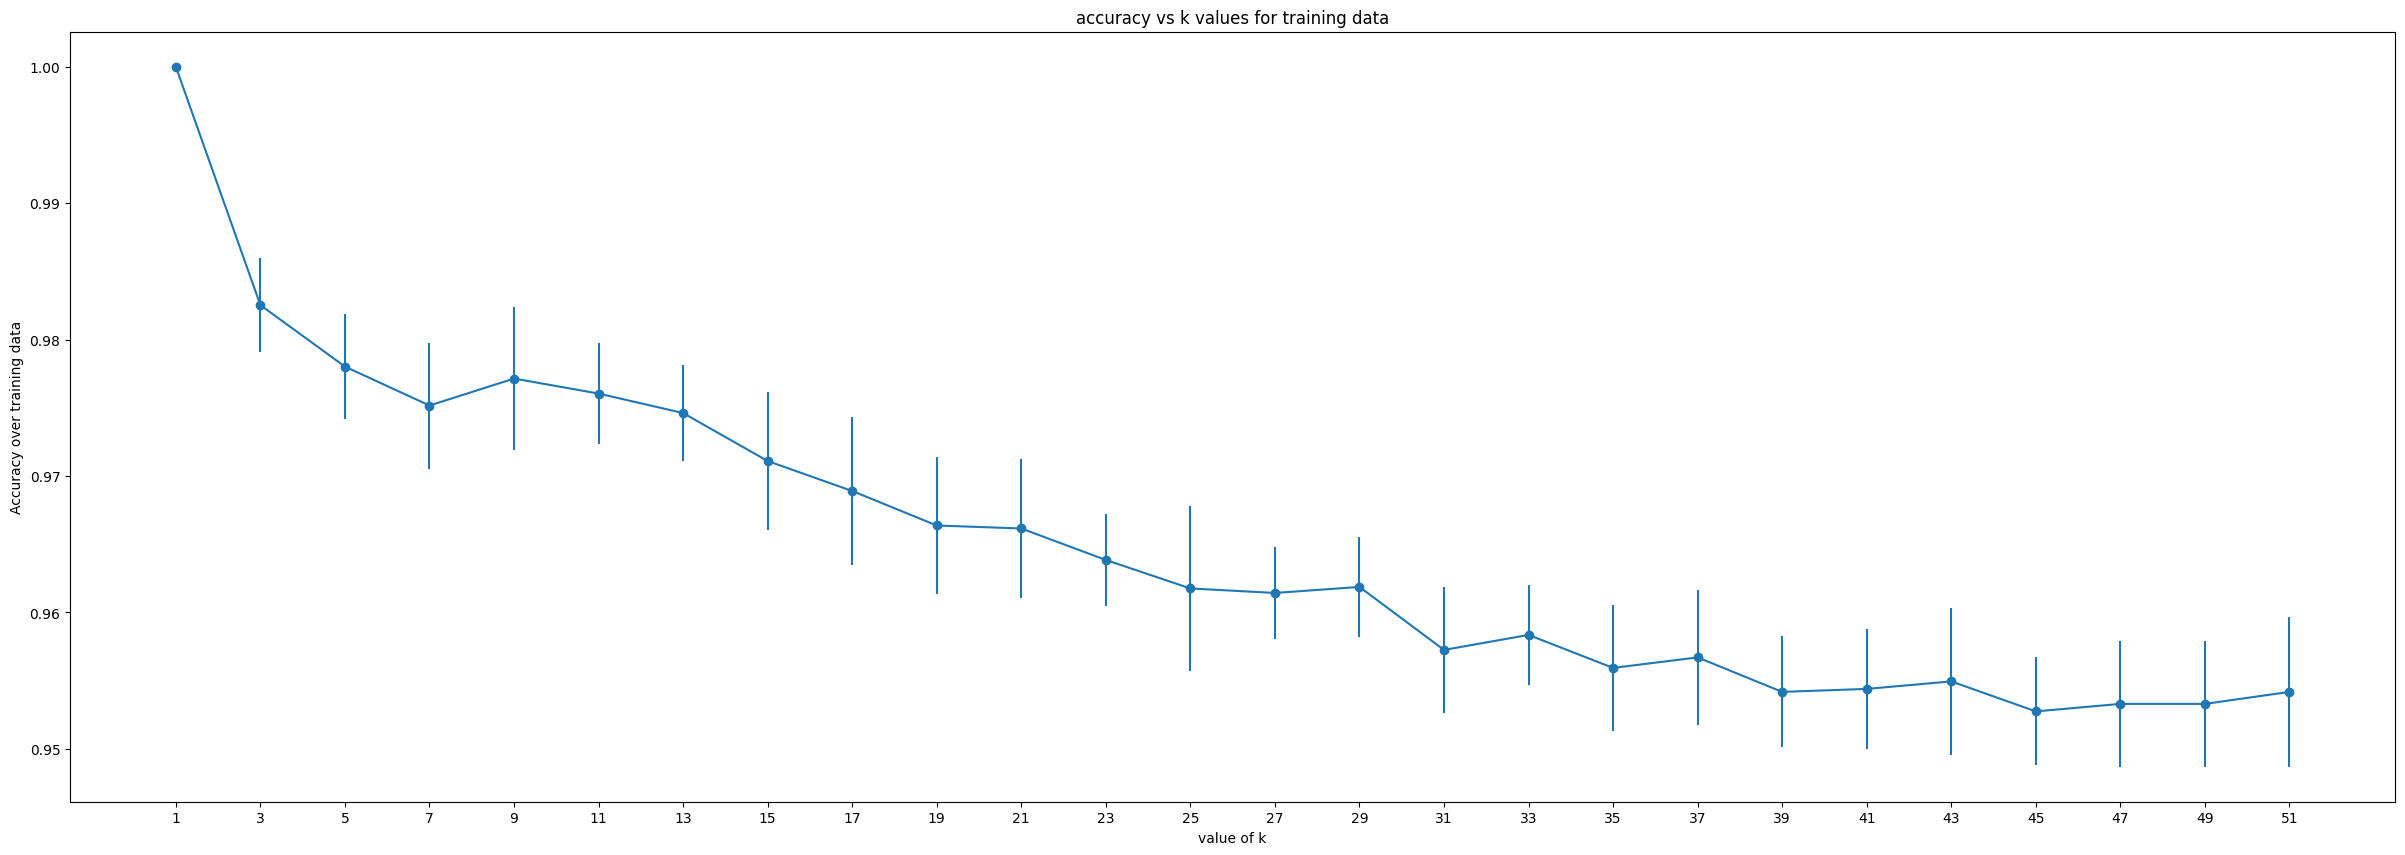

In [209]:
#draw graphs
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
plt.errorbar(k_values, train_means, yerr=train_stds, fmt ='-o')
plt.xlabel('value of k')
plt.ylabel('Accuracy over training data')
plt.title('accuracy vs k values for training data')
plt.xticks(k_values)

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


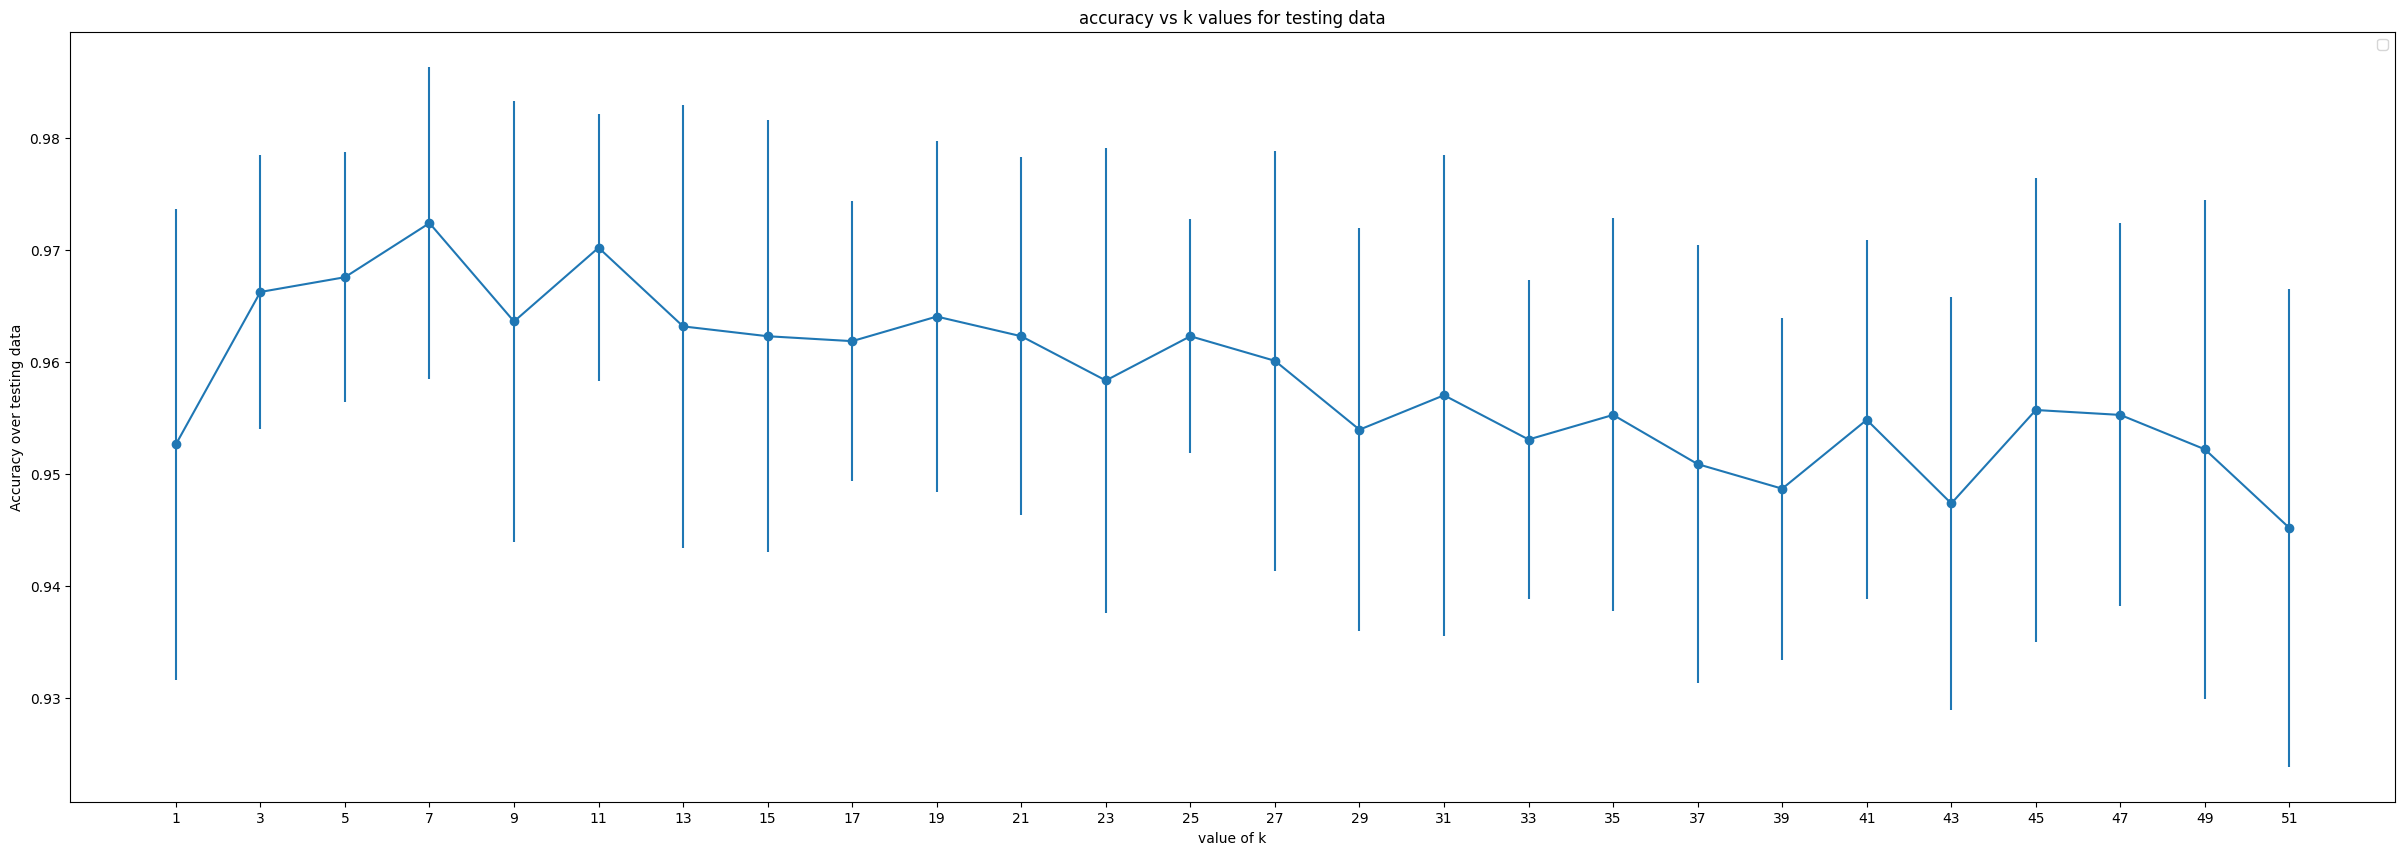

In [ ]:
plt.figure(figsize=(30,10))
plt.errorbar(k_values, test_means, yerr=test_stds, fmt ='-o')
plt.xlabel('value of k')
plt.ylabel('Accuracy over testing data')
plt.title('accuracy vs k values for testing data')
plt.xticks(k_values)

plt.show()

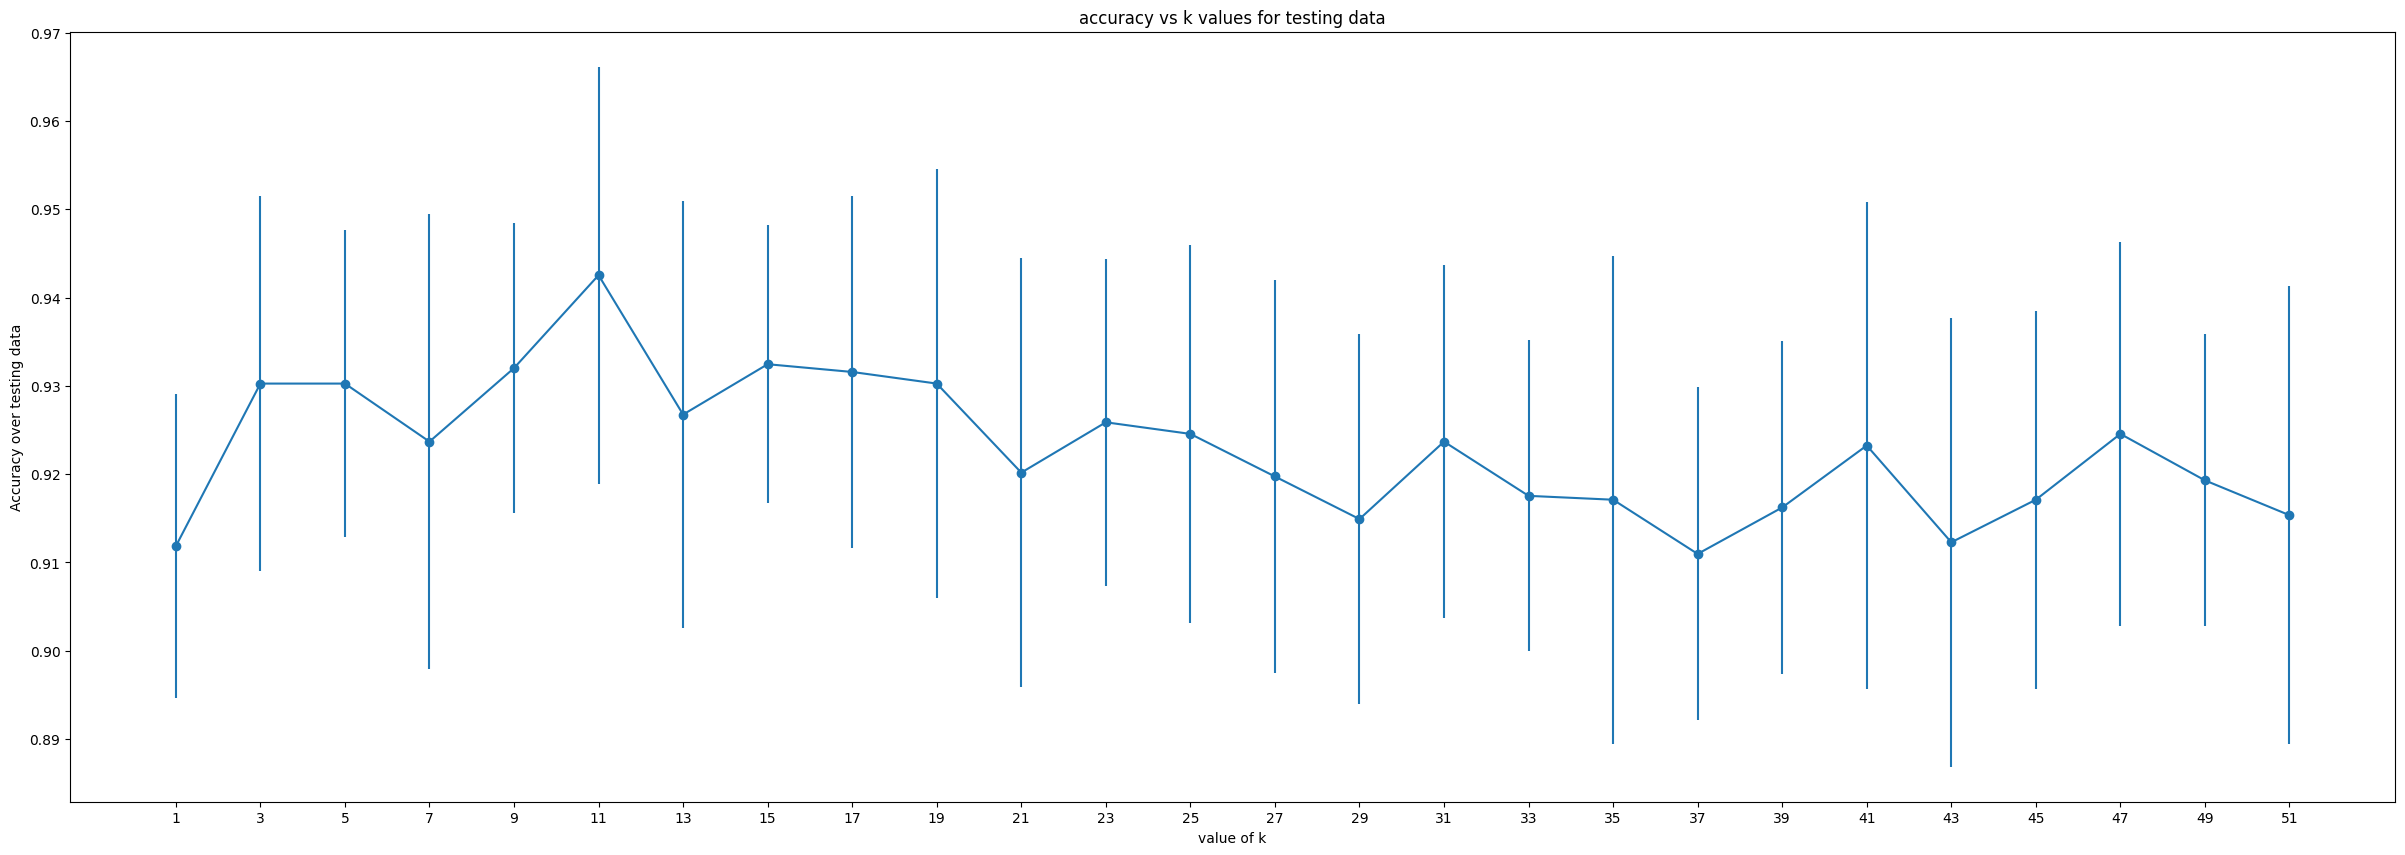

In [6]:
# Q1.6
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
plt.errorbar(k_values, test_means, yerr=test_stds, fmt ='-o')
plt.xlabel('value of k')
plt.ylabel('Accuracy over testing data')
plt.title('accuracy vs k values for testing data')
plt.xticks(k_values)

plt.show()